In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [41]:
ds= pd.read_csv('ClusterMain.csv')

In [42]:
ds.set_index('계약일', inplace = True)

In [43]:
#범주형/연속형 변수 분리
cat_col = ['자치구명', '임대건물명', '정책성향']
con_col = ['층', '임대면적', '건축년도', '경제활동인구', '기준금리', '전세가격비율', '아파트매매실거래지수', '회사채수익률', '소비자물가지수', '통화량', '광공업지수']

In [44]:
ds_raw = ds.copy() #원본 데이터 copy

In [45]:
#get_dummies()로 범주형 변수 원핫인코딩
ds = pd.get_dummies(ds, columns=cat_col, drop_first=True)

In [46]:
#train, test, val 분리
X = ds.drop(columns='보증금')
y = ds[['보증금']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [48]:
X_train

,층,임대면적,건축년도,경제활동인구,기준금리,전세가격비율,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,...,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,임대건물명_단독/다가구,임대건물명_아파트,임대건물명_오피스텔,정책성향_2
계약일,,,,,,,,,,,,,,,,,,,,,
2022-01-17,1,46.36,1993,28012,0.5,64.9,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,1,0,0,0
2022-03-05,15,29.53,2004,28310,0.5,65.3,175.10,3.03,106.06,3656.1,...,0,1,0,0,0,0,0,1,0,0
2022-05-06,2,84.41,1989,28310,0.5,65.0,175.55,3.63,107.56,3656.1,...,0,0,0,0,0,0,0,1,0,0
2022-02-17,1,18.00,2012,28310,0.5,65.3,173.70,2.87,105.30,3656.1,...,0,0,0,0,0,0,1,0,0,0
2022-04-02,11,75.51,1986,28310,0.5,65.0,175.55,3.63,106.85,3656.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17,2,84.64,2019,28012,0.5,65.1,175.40,2.63,104.69,3634.3,...,0,0,0,0,0,0,0,1,0,0
2022-03-20,6,28.13,2022,28310,0.5,65.0,175.10,3.03,106.06,3656.1,...,0,0,0,0,0,0,0,0,0,0
2022-04-28,5,46.34,2015,28310,0.5,65.0,175.55,3.63,106.85,3656.1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#연속형 변수 스케일링
scaler = StandardScaler()
scaler.fit(X_train.loc[:,con_col])

X_train.loc[:,con_col] = scaler.transform(X_train.loc[:,con_col])
X_test.loc[:,con_col]  = scaler.transform(X_test.loc[:,con_col])
X_val.loc[:,con_col]   = scaler.transform(X_val.loc[:,con_col])

In [50]:
import lightgbm as lgb

In [51]:
params = {'learning_rate': 0.01,
          'max_depth': 16,
          'boosting': 'gbdt',
          'objective': 'regression',
          'metric': 'mse',
          'is_training_metric': True,
          'num_leaves': 144,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'seed':2020}

In [52]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='regression')
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_val)
accuracy_score(y_val, y_pred)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01818181818181818

In [53]:
#파라미터는 dict에
#param = {'num_leaves': 31, 'objective': 'binary', 'metric':'auc'}

#train data를 별도의 Dataset객체로 만들어야 함
train_data = lgb.Dataset(X_train, label=y_train.values)
test_data = lgb.Dataset(X_test, label=y_test.values)

#boosting을 몇 번 할건지 결정
num_round = 10 

#모델에 훈련
bst = lgb.train(params, train_data, 1000, test_data, verbose_eval=100, early_stopping_rounds=100)

#예측
y_pred_val = bst.predict(X_val)
print(y_pred_val)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 48012, number of used features: 39
[LightGBM] [Info] Start training from score 34494.404815
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.61535e+08
[200]	valid_0's l2: 1.78217e+08
[300]	valid_0's l2: 1.56511e+08
[400]	valid_0's l2: 1.47141e+08
[500]	valid_0's l2: 1.42218e+08
[600]	valid_0's l2: 1.38565e+08
[700]	valid_0's l2: 1.35888e+08
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's l2: 1.33649e+08
[900]	valid_0's l2: 1.31786e+08
[1000]	valid_0's l2: 1.30221e+08
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.30221e+08
[11097.16846414 44076.87773343 32281.45485971 ...

In [55]:
#확률값을 라벨값으로
#y_pred_val = pd.Series(y_pred_val).apply(lambda x: 1 if x>=0.5 else 0) 

#성능평가
#accuracy_score(y_val.values, y_pred_val.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

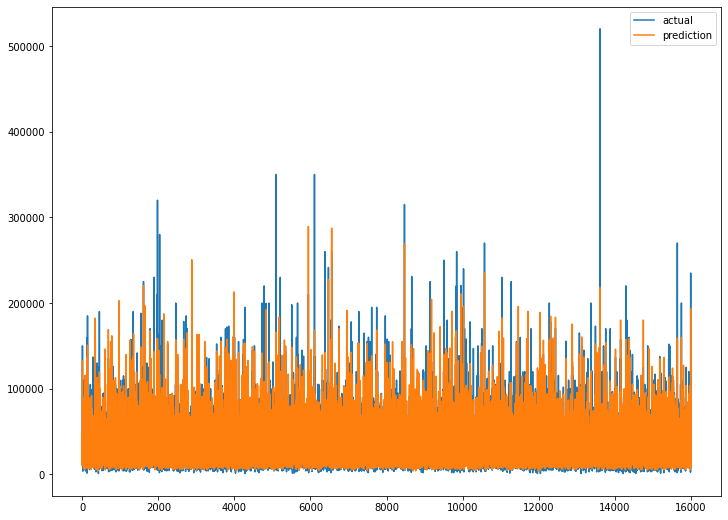

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(y_val.values, label = 'actual')
plt.plot(y_pred_val, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_val.values, y_pred_val):.3f}")

MAPE: 120.108


In [ ]:
from sklearn import metrics

print("MAE : " + str(metrics.mean_absolute_error(y_val.values, y_pred_val)))
print("MSE : " + str(metrics.mean_squared_error(y_val.values, y_pred_val)))
print("RMSE : " + str(np.sqrt(metrics.mean_squared_error(y_val.values, y_pred_val))))
print("R^2 : " + str(metrics.r2_score(y_val.values,y_pred_val)))

MAE : 6672.915416181273
MSE : 134861413.46028128
RMSE : 11612.984692157364
R^2 : 0.8235285603740193
